In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# load data from the corrMaster folder: this folder contains summary correlations/sim scores from each session
fileList = glob.glob('../Meetz/corrMaster/*.npy')

In [3]:
# number of sessions
print(len(fileList))

7


In [4]:
# after loading data, each session is concatenated into a master Matrix (masterMat)
masterMat = np.load(fileList[0])
for i in fileList[1:]:
    tempMat = np.load(i)
    masterMat = np.concatenate((masterMat,tempMat),axis=1)

In [5]:
# seshList = [1,2,3,4,6]
# masterMat = np.load(fileList[0])
# for i in seshList:
#     tempMat = np.load(fileList[i])
#     masterMat = np.concatenate((masterMat,tempMat), axis=1)


In [5]:
np.shape(masterMat)

(8, 1129)

In [52]:
fileList

['../Meetz/corrMaster/pairCorrelationsAndSimScores221010.npy',
 '../Meetz/corrMaster/pairCorrelationsAndSimScores221110.npy',
 '../Meetz/corrMaster/pairCorrelationsAndSimScores221117.npy',
 '../Meetz/corrMaster/pairCorrelationsAndSimScores221115.npy',
 '../Meetz/corrMaster/pairCorrelationsAndSimScores221128.npy',
 '../Meetz/corrMaster/pairCorrelationsAndSimScores221124.npy',
 '../Meetz/corrMaster/pairCorrelationsAndSimScores221108.npy']

In [54]:
fileList[6]

'../Meetz/corrMaster/pairCorrelationsAndSimScores221108.npy'

## Individual Session (user-defined)

<IPython.core.display.Javascript object>


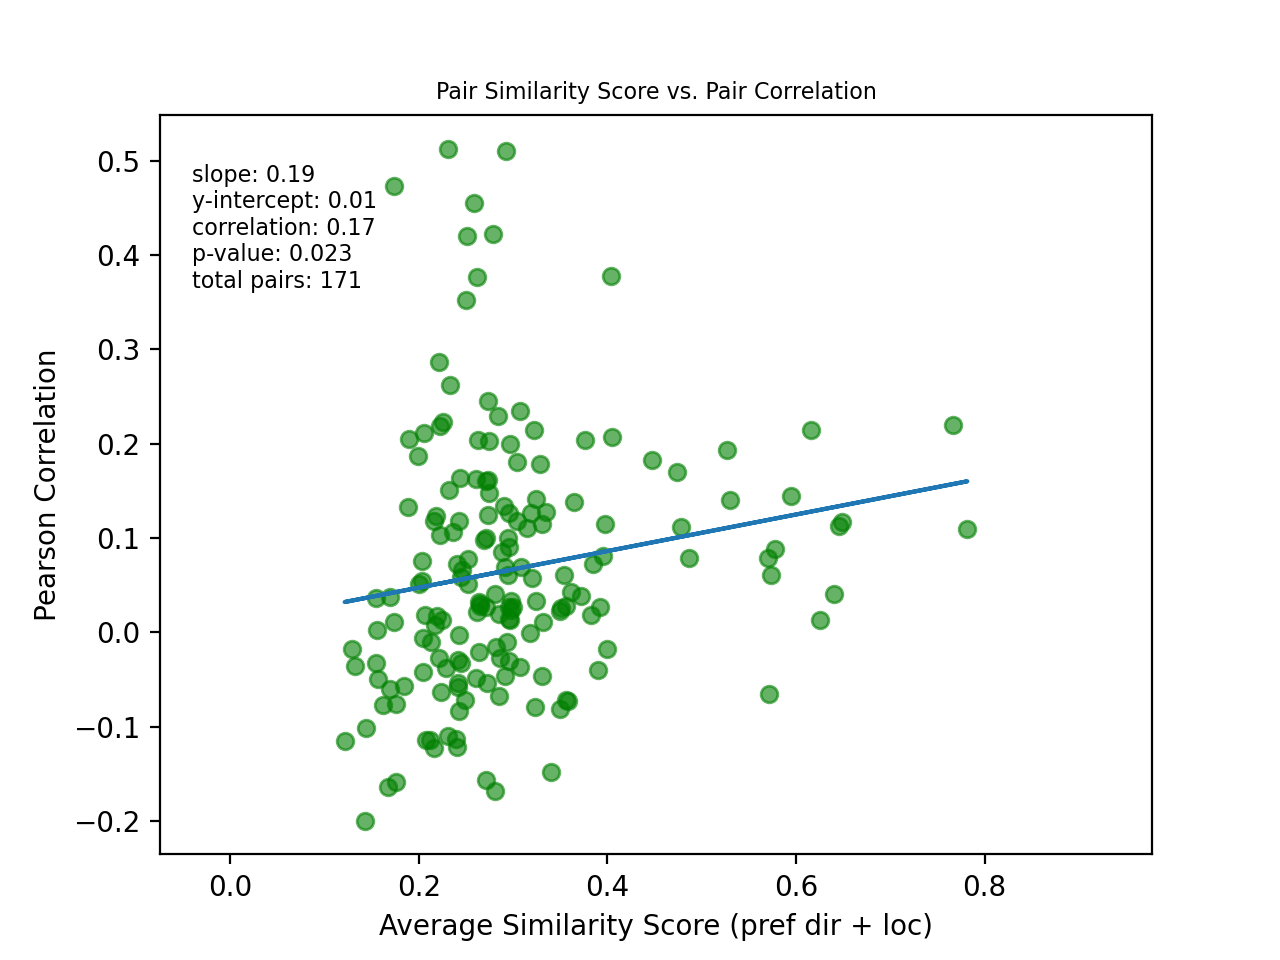

In [55]:
%matplotlib notebook
tempMat = np.load(fileList[6])

# x = (tempMat[7]+tempMat[2]+tempMat[3])/3 # some similarity measure
x = (tempMat[7])
y = tempMat[0] # correlations

fig = plt.figure()
plt.scatter(x, y, color='green', alpha=0.6)
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel('Average Similarity Score (pref dir + loc)')
plt.ylabel('Pearson Correlation')
plt.xlim([0,1])
pearsonR, pValue = stats.pearsonr(x,y)
plt.axis('equal')
plt.title('Pair Similarity Score vs. Pair Correlation', fontsize=8)
text = fig.text(0.15,0.70, f'slope: {m:.2f}\n\
y-intercept: {b:.2f}\n\
correlation: {pearsonR:.2f}\n\
p-value: {pValue:.2g}\n\
total pairs: {len(tempMat[6])}', fontsize=8)
plt.show()

masterMat[0]: pair pairwise correlations <br>
masterMat[1]: pair direction similarity score (Bhattachharya distance of their direction tuning curves) <br>
masterMat[2]: pair direction similarity score (based off preference for the preferred direction only) <br>
masterMat[3]: pair location similarity score (Bhattachharya distance of their 2D gaussian RF location curves) <br>
masterMat[4]: pair combined similarity score (average of Bhattachharya distance for direction and RF location) <br>
masterMat[5]: pair combined similarity score (multiplied value of BD distance for direction and RF location) <br>
masterMat[6]: pair combined similarity score (average of preferred direction only similarity score and RF location)

## Population Plots

In [12]:
a = np.where(masterMat[3] > 0.05)[0]

<IPython.core.display.Javascript object>


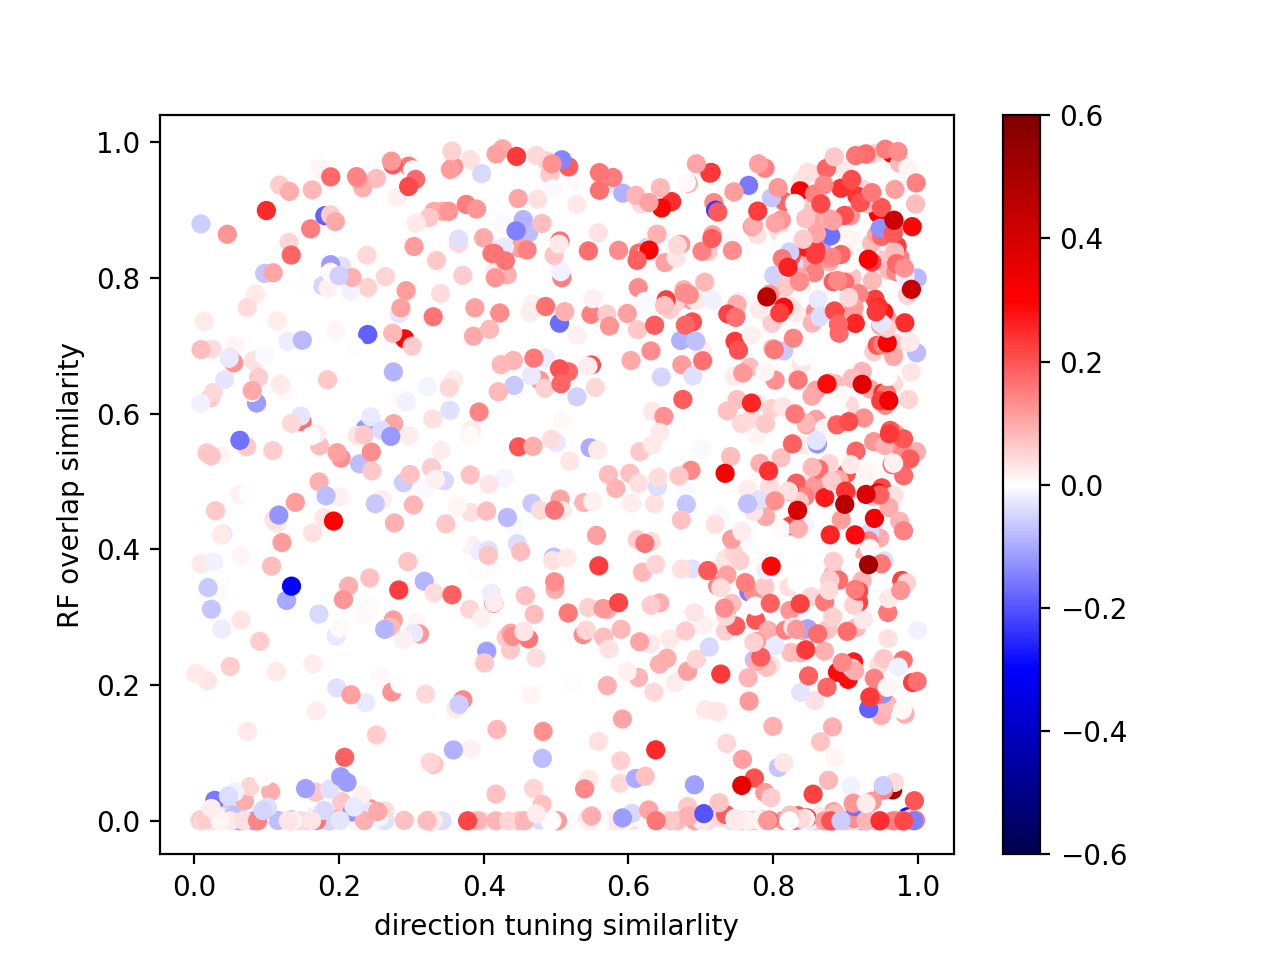

In [28]:
%matplotlib notebook

cm = plt.cm.get_cmap('seismic')
x = masterMat[2] # direction sim
y = masterMat[3] # RF overlap sim
z = masterMat[0] # noise correlations
sc = plt.scatter(x, y, c=z, s=35, cmap=cm, vmin=-0.6, vmax=0.6)
# vmin=-0.6, vmax=0.6
plt.colorbar(sc)
plt.xlabel('direction tuning similarlity')
plt.ylabel('RF overlap similarity')
plt.show()


<IPython.core.display.Javascript object>


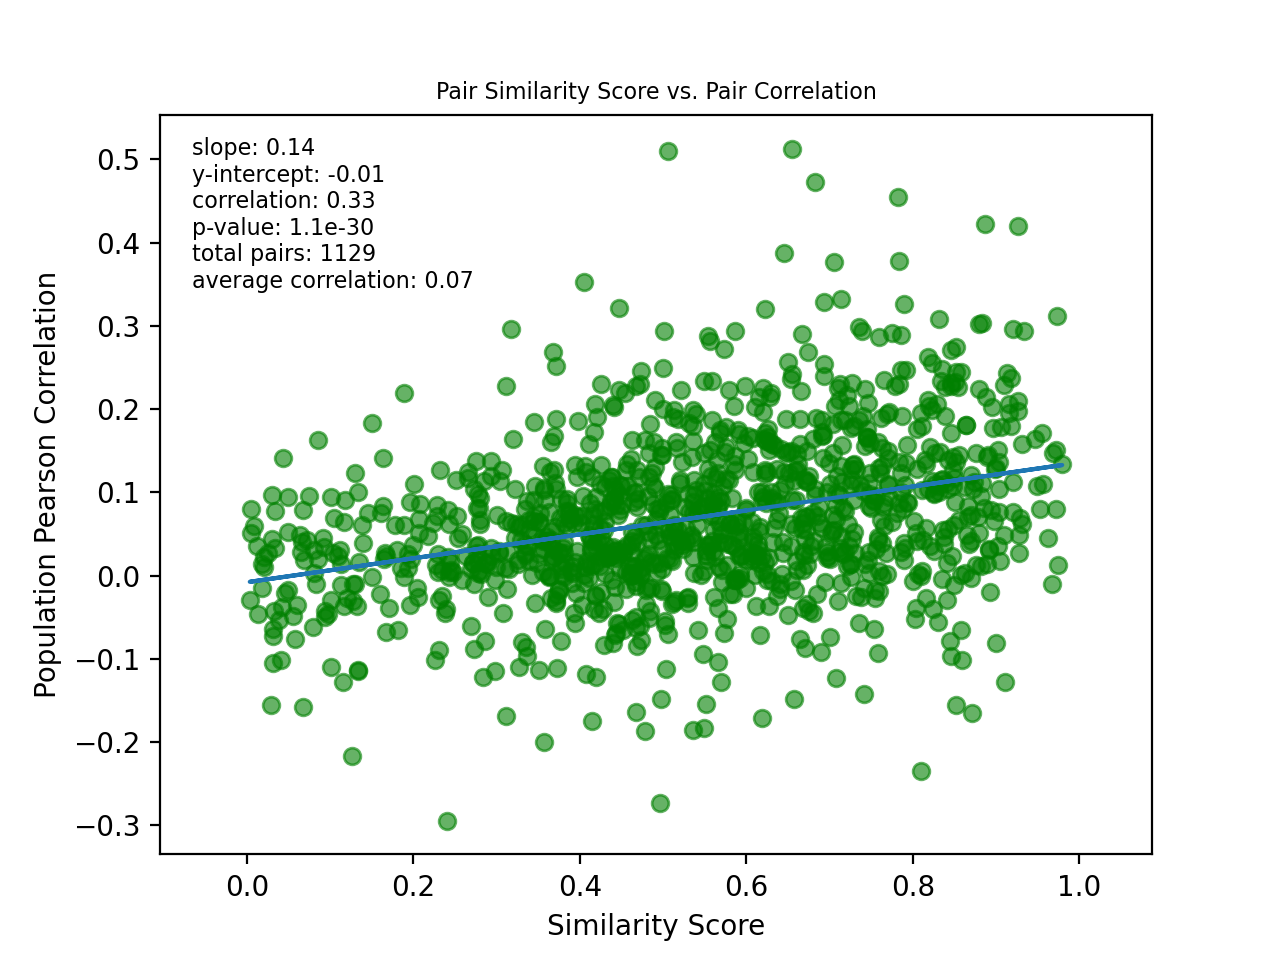

In [24]:
%matplotlib notebook

# x = (masterMat[3]+masterMat[7])/2 # some similarity measure
x = masterMat[6]
y = masterMat[0] # correlations

fig = plt.figure()
plt.scatter(x, y, color='green', alpha=0.6)
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel('Similarity Score')
plt.ylabel('Population Pearson Correlation')
plt.xlim([0,1])
pearsonR, pValue = stats.pearsonr(x,y)
plt.axis('equal')
plt.title('Pair Similarity Score vs. Pair Correlation', fontsize=8)
text = fig.text(0.15,0.70, f'slope: {m:.2f}\n\
y-intercept: {b:.2f}\n\
correlation: {pearsonR:.2f}\n\
p-value: {pValue:.2g}\n\
total pairs: {len(masterMat[0])}\n\
average correlation: {np.mean(masterMat[0]):.2f}', fontsize=8)
plt.show()

<IPython.core.display.Javascript object>


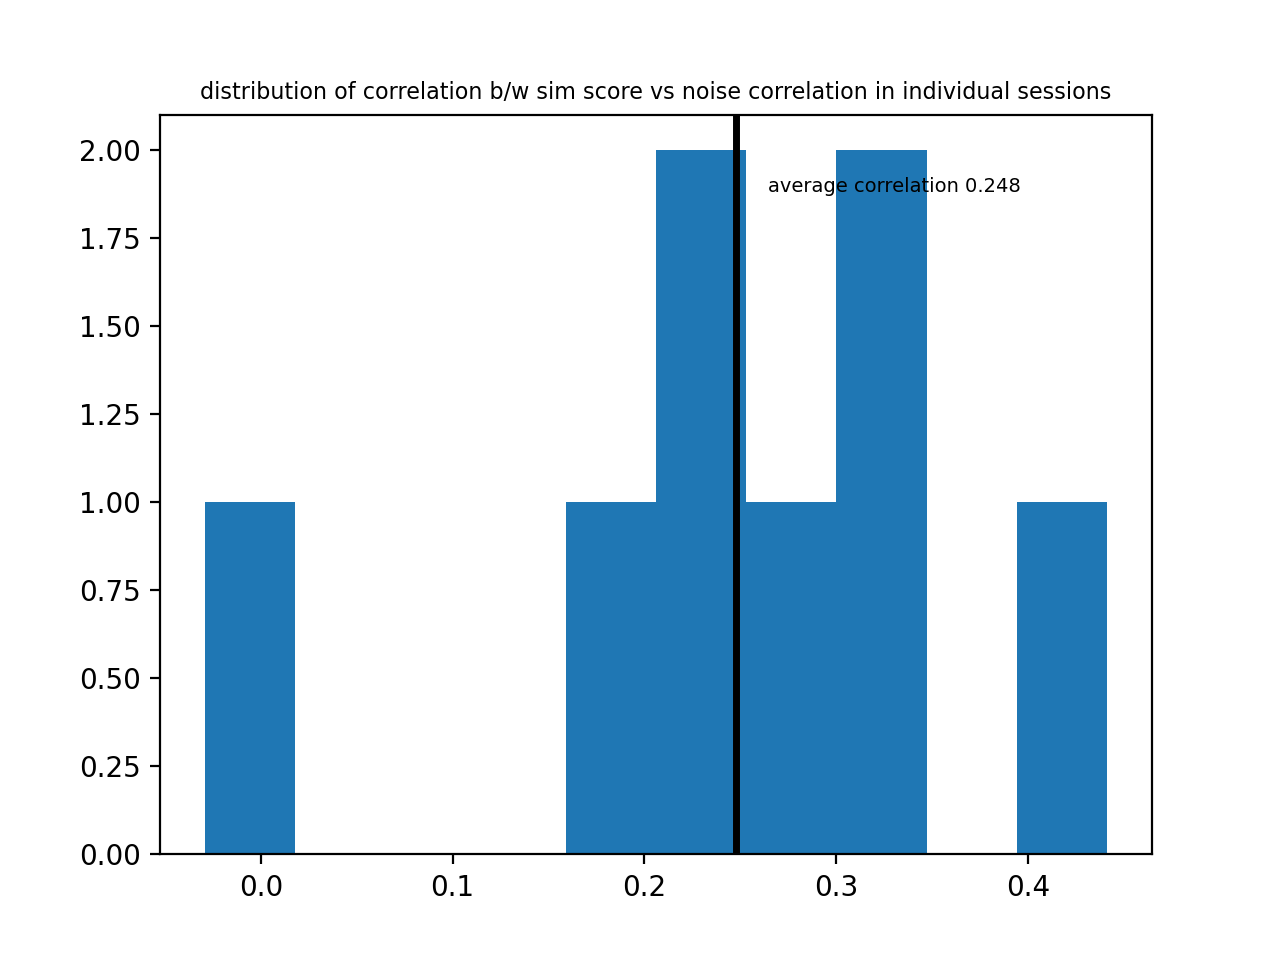

In [28]:
%matplotlib notebook
seshCorr = []
for i in fileList:
    tempMat = np.load(i)
    pearsonR, pValue = stats.pearsonr(tempMat[6],tempMat[0])
    seshCorr.append(pearsonR)
seshCorr = np.array(seshCorr)

fig = plt.figure()
plt.hist(seshCorr)
plt.axvline(np.mean(seshCorr),color='black',linewidth=2.5)
# plt.title(f'average correlation between sim score and noise correlations {np.mean(seshCorr):.3f}')
plt.title('distribution of correlation b/w sim score vs noise correlation in individual sessions', fontsize=8)
text = fig.text(0.60,0.80,f'average correlation {np.mean(seshCorr):.3f}',fontsize=7)
plt.show()

average correlation between shuffled data: -0.0019962463941906932


<IPython.core.display.Javascript object>


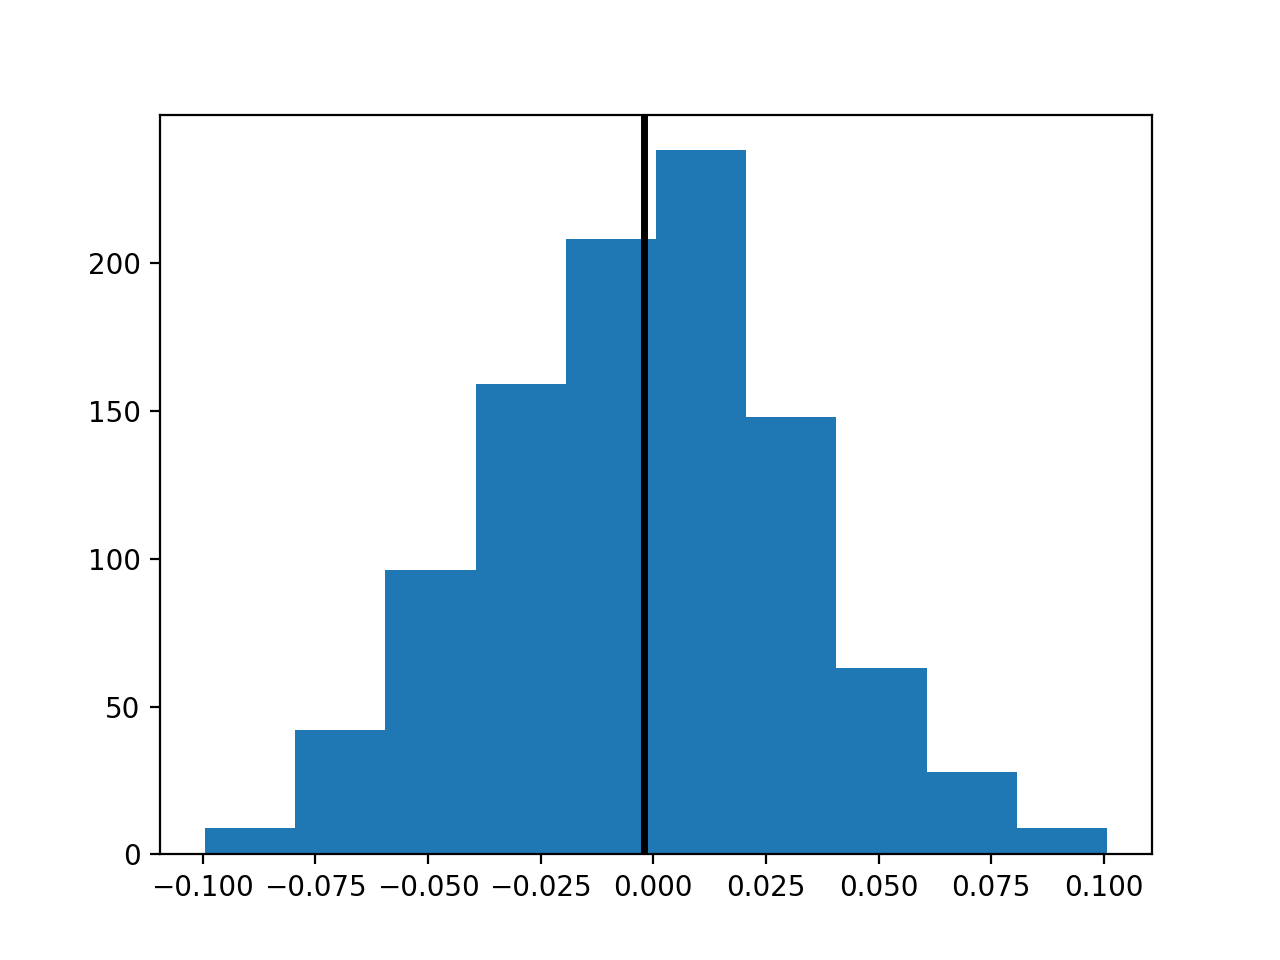

In [21]:
%matplotlib notebook
shuffCorr = []
for i in range(1000):
    x = np.copy(masterMat[6]) # some similarity measure
    np.random.shuffle(x)
    y = masterMat[0] # correlations
    pearsonR, pValue = stats.pearsonr(x,y)
    shuffCorr.append(pearsonR)
print(f'average correlation between shuffled data: {np.mean(shuffCorr)}')
shuffCorr = np.array(shuffCorr)
plt.hist(shuffCorr)
plt.axvline(np.mean(shuffCorr), color='black', linewidth=2.5)
plt.show()
    